In [ ]:
import numpy as np
import pandas as pd

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("Pubchem_properties.csv")

In [15]:
def prepare_data_for_kg(data):
    records = data.to_dict(orient="records")
    
    tuples_to_add = []
    for record in records:
        chem_name = record['Name']
        record.pop('Name')
        tuples_to_add.append((chem_name,record))
    
    return tuples_to_add

In [16]:
data_for_kg = prepare_data_for_kg(data)

In [125]:
data_for_kg

[('ABIETIC ACID',
  {'Unnamed: 0': 0,
   'Molecular Weight': '3g/mol',
   'XLogP3': 4.8,
   'Hydrogen Bond Donor Count': 1,
   'Hydrogen Bond Acceptor Count': 2,
   'Rotatable Bond Count': 2,
   'Exact Mass': '3g/mol',
   'Monoisotopic Mass': '3g/mol',
   'Topological Polar Surface Area': 37.3,
   'Heavy Atom Count': 22,
   'Formal Charge': 0,
   'Complexity': 542.0,
   'Isotope Atom Count': 0,
   'Defined Atom Stereocenter Count': 4,
   'Undefined Atom Stereocenter Count': 0,
   'Defined Bond Stereocenter Count': 0,
   'Undefined Bond Stereocenter Count': 0,
   'Covalently-Bonded Unit Count': 1,
   'Compound Is Canonicalized': 'Y'}),
 ('ABIETYL ALCOHOL',
  {'Unnamed: 0': 1,
   'Molecular Weight': '2g/mol',
   'XLogP3': 4.9,
   'Hydrogen Bond Donor Count': 1,
   'Hydrogen Bond Acceptor Count': 1,
   'Rotatable Bond Count': 2,
   'Exact Mass': '2g/mol',
   'Monoisotopic Mass': '2g/mol',
   'Topological Polar Surface Area': 20.2,
   'Heavy Atom Count': 21,
   'Formal Charge': 0,
   'Comp

In [127]:
G = nx.Graph()
G.add_nodes_from(data_for_kg[10:100])

In [128]:
def make_graph_for_property(property_name, threshold):
    '''
    This function creates a graph with property_name values within threshold units.
    '''
    for node, attrs in G.nodes(data=True):
        for new_node, attrs_new in G.nodes(data=True):
            # skip node we just added
            if node != new_node:
                if(attrs[property_name] - attrs_new[property_name] <=threshold):
                    G.add_edge(node, new_node)
    return G

In [129]:
def make_graph_for_property_greater_than_x(property_name,threshold,value):
    '''
    This function creates a graph with property_name values within threshold units and greater than value.
    '''
    for node, attrs in G.nodes(data=True):
        for new_node, attrs_new in G.nodes(data=True):
            if((attrs[property_name] - attrs_new[property_name] <=2) and (attrs[property_name]>=value) and (attrs_new[property_name] >=value)):
                G.add_edge(node, new_node)
    return G

In [130]:
connected_graph = make_graph_for_property_greater_than_x('XLogP3',5,3)

In [131]:
# connnected_graph = make_graph_for_property('XLogP3',5)

In [132]:
connnected_graph.nodes()

NodeView(('ACETYL CYSTEINE', 'ACETYL GLUCOSAMINE', 'ACETYL GLUTAMIC ACID', 'ACETYL GLUTAMINE', 'ACETYL HEXAMETHYL INDAN', 'ACETYL HEXAMETHYL TETRALIN', 'ACETYL METHIONINE', 'ACETYL TYROSINE', 'ACETYLATED SUCROSE DISTEARATE', 'ACHILLEA MILLEFOLIUM OIL', 'ACID BLACK 1', 'ACID BLACK 52', 'ACID BLUE 1', 'ACID BLUE 3', 'ACID BLUE 9', 'ACID BLUE 62', 'ACID BLUE 74', 'ACID BROWN 13', 'ACID GREEN 1', 'ACID GREEN 25'))

In [134]:
list_of_connected_nodes = [y for x in connnected_graph.edges() for y in x]

In [135]:
c_list = []
for node in connnected_graph.nodes():
    if node in list_of_connected_nodes:
        c_list.append('green')
    else:
        c_list.append('gray')

In [136]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

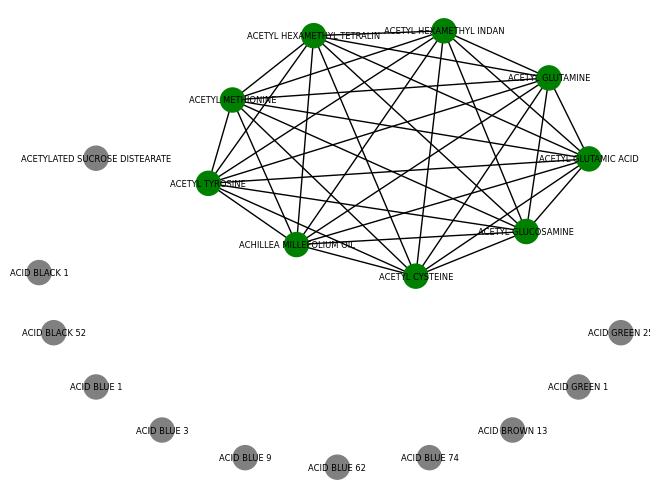

In [137]:
#G = nx.petersen_graph()
nx.draw_kamada_kawai(connnected_graph, with_labels=True, node_color=c_list,arrowsize=20.0,font_size=6)